In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
os.listdir()
# plt.rcParams['figure.figsize'] = (10, 6)

['Kaggle.ipynb',
 'corr.csv',
 '.Rapp.history',
 'train.csv',
 '.ipynb_checkpoints']

In [3]:
tdata=pd.read_csv('train.csv')

In [4]:
tdata.shape

(1460, 81)

In [5]:
# Country['population'].mean()
# Country[Country['continent']=='Asia']['population'].sum()
# Country[Country['coastal']==False].country.count()
# ----------
# Aggregation on groupby() :
# colFun = {'country':['count'],'population': ['sum','min', 'max','mean','std']}
# Check for list of items in Column:
# df[(df['language'].isin(langs)) & (df['imdb_score']>7)]
# ----------
# Quick histogram with dropping NA:
# plt.hist(np.log(df['budget'].dropna()))
# ----------
# outlier removal
# scatter_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)
# ---------
# Filtering:
# country_df = df.groupby('country').filter(lambda x: x.shape[0] > 10)
# Rename Columns:

# Remove rows and columns:
# df1.drop('a', 1), df1.loc[df1.index != 'two']
# ----------
# Check NAs
# np.sum(df_miss.isnull(), axis=1)
# ------------
# Filling NAs
# df['one'].fillna(df['one'].mean()), df.interpolate(method='linear')
df.describe()
df.shape
df.value_counts()
df.columns.to_list()

NameError: name 'df' is not defined

In [6]:
tdata.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [7]:
tdata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Skew is: 1.8828757597682129


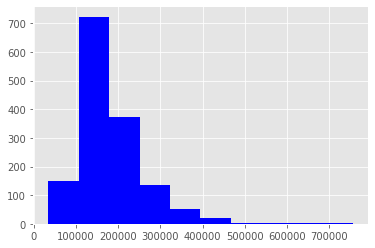

In [8]:
print ("Skew is:", tdata.SalePrice.skew())
plt.hist(tdata.SalePrice, color='blue')
plt.show()

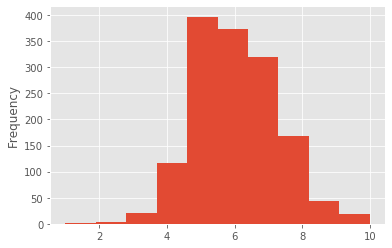

In [9]:
tdata.OverallQual.plot.hist()

In [10]:
# ridge.fit(house_features, prices)
# print('the ridge intercept is: %.2f' %(ridge.intercept_))
# pd.Series(ridge.coef_, index=house_features.columns)


# check which feature drives the house price!!!
# Do ridge and lasso regression!!! Watch for variables slowly dropping to zero!
# Do lambda rough steps. Fast iterations for time saving!

# get a basic machine learning done by end of week!!!!!!!!!!




In [127]:
mydf = tdata[['TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']]

In [128]:
type(mydf)

pandas.core.frame.DataFrame

In [129]:
mydf.dtypes

TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64
GarageFinish      object
GarageCars         int64
GarageArea         int64
GarageQual        object
GarageCond        object
PavedDrive        object
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
PoolQC            object
Fence             object
MiscFeature       object
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
dtype: object

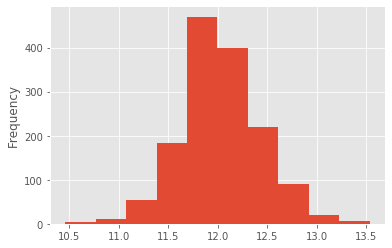

In [14]:
np.log(mydf.SalePrice).plot.hist()

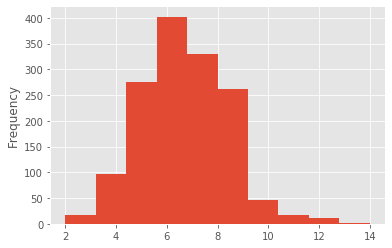

In [15]:
mydf.TotRmsAbvGrd.plot.hist()

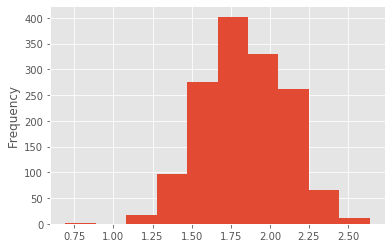

In [16]:
np.log(mydf.TotRmsAbvGrd).plot.hist()

In [130]:
mydf.head()

,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [100]:
mydf[[ 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']][:50]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,Attchd,2003.0,RFn,2,548,TA,TA
1,Attchd,1976.0,RFn,2,460,TA,TA
2,Attchd,2001.0,RFn,2,608,TA,TA
3,Detchd,1998.0,Unf,3,642,TA,TA
4,Attchd,2000.0,RFn,3,836,TA,TA
5,Attchd,1993.0,Unf,2,480,TA,TA
6,Attchd,2004.0,RFn,2,636,TA,TA
7,Attchd,1973.0,RFn,2,484,TA,TA
8,Detchd,1931.0,Unf,2,468,Fa,TA
9,Attchd,1939.0,RFn,1,205,Gd,TA


In [19]:
mydf.shape

(1460, 27)

In [102]:
mydf[mydf.PavedDrive=='N']

,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
21,6,Typ,1,Gd,Attchd,1930.0,Unf,1,280,TA,...,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,139400
30,6,Typ,0,NaN,Detchd,1920.0,Unf,1,250,TA,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
39,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,...,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
48,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
61,6,Typ,0,NaN,Detchd,1935.0,Unf,1,288,TA,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,101000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,7,Typ,0,NaN,Detchd,1922.0,Unf,1,240,TA,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,125500
1396,7,Min1,2,TA,Detchd,1966.0,Unf,2,572,TA,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,160000
1397,8,Typ,0,NaN,Detchd,1933.0,Unf,1,180,Fa,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,137500
1414,8,Typ,1,Gd,Detchd,1922.0,Unf,2,370,TA,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,207000


In [103]:
mydf.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

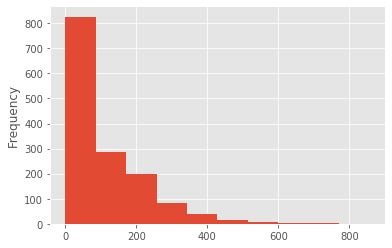

In [104]:
mydf.WoodDeckSF.plot.hist()

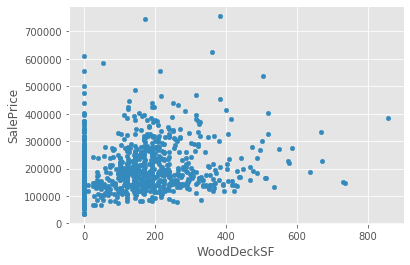

In [24]:
mydf.plot.scatter(x='WoodDeckSF',y='SalePrice')

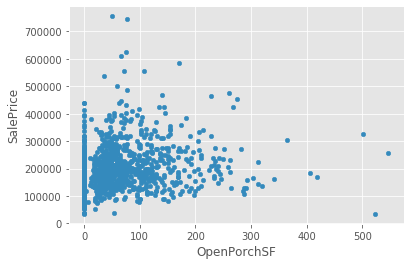

In [25]:
mydf.plot.scatter(x='OpenPorchSF',y='SalePrice')

In [26]:
np.sum(mydf[mydf['OpenPorchSF']==0])

TotRmsAbvGrd                                                  3993
Functional       TypMin1TypTypTypTypMin1TypTypTypTypTypTypTypTy...
Fireplaces                                                     308
GarageYrBlt                                            1.18202e+06
GarageCars                                                     975
GarageArea                                                  260241
PavedDrive       YYYYYYYNYYNYYYNYYYYYYYNYYYYYYYYYYYNYYYYPYYYYNY...
WoodDeckSF                                                   49212
OpenPorchSF                                                      0
EnclosedPorch                                                21457
3SsnPorch                                                     1680
ScreenPorch                                                   9497
PoolArea                                                      1224
MiscVal                                                      38124
MoSold                                                        

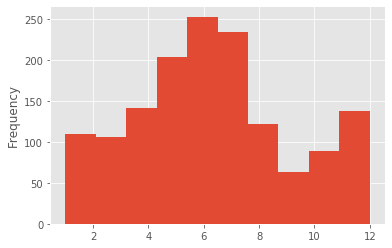

In [27]:
mydf.MoSold.plot.hist()

In [28]:
corrdf = mydf.corr()
corrdf.shape

(15, 15)

In [29]:
corrdf.columns.to_list()

['TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [30]:
corrdf.iloc[[14]].to_csv('corr.csv')

In [31]:
tdata.shape

(1460, 81)

In [32]:
fullcorr  = tdata.corr()

In [50]:
basicdf = tdata.copy()

In [131]:
np.sum(mydf.isnull(), axis = 1)

0       4
1       3
2       3
3       3
4       3
       ..
1455    3
1456    2
1457    1
1458    4
1459    4
Length: 1460, dtype: int64

In [132]:
np.sum(mydf.isnull(),axis =0)

TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

In [135]:
# Get rid of columns with many NANs. 

mydf2 = mydf.drop('PoolQC',1)
#.drop('Fence',1).drop('MiscFeature',1)
mydf2 = mydf.drop('FireplaceQu',1)

In [139]:
mydf2.drop('PoolQC',1).drop('PoolArea',1).drop('Fence',1).drop('MiscFeature',1)
mydf2.drop('PoolQC',1).drop('PoolArea',1).drop('SaleType',1)

,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,...,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,...,0,0,0,NaN,NaN,0,2,2008,Normal,208500
1,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,...,0,0,0,NaN,NaN,0,5,2007,Normal,181500
2,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,...,0,0,0,NaN,NaN,0,9,2008,Normal,223500
3,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,...,272,0,0,NaN,NaN,0,2,2006,Abnorml,140000
4,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,...,0,0,0,NaN,NaN,0,12,2008,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7,Typ,1,Attchd,1999.0,RFn,2,460,TA,TA,...,0,0,0,NaN,NaN,0,8,2007,Normal,175000
1456,7,Min1,2,Attchd,1978.0,Unf,2,500,TA,TA,...,0,0,0,MnPrv,NaN,0,2,2010,Normal,210000
1457,9,Typ,2,Attchd,1941.0,RFn,1,252,TA,TA,...,0,0,0,GdPrv,Shed,2500,5,2010,Normal,266500
1458,5,Typ,0,Attchd,1950.0,Unf,1,240,TA,TA,...,112,0,0,NaN,NaN,0,4,2010,Normal,142125


In [150]:
# mydf2 = mydf2.drop('PoolQC',1).drop('PoolArea',1).drop('Fence',1).drop('MiscFeature',1)
# mydf2 = mydf2.drop('GarageFinish',1).drop('GarageType',1)
mydf2 = mydf2.drop('PavedDrive',1).drop('SaleType',1)

In [151]:
np.sum(mydf2.isnull(),axis =0)

TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
MiscVal          0
MoSold           0
YrSold           0
SaleCondition    0
SalePrice        0
dtype: int64

In [147]:
# Get Rid of rows with NAs. Mainly Garage related things ~81 rows.
mydf2 = mydf2[~mydf2.GarageQual.isnull()]

In [148]:
# CHECK IF we managed to remove teh NAs
np.sum(mydf2.isnull(),axis =0)

TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

In [152]:
mydf2.head()

,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,8,Typ,0,2003.0,2,548,TA,TA,0,61,0,0,0,0,2,2008,Normal,208500
1,6,Typ,1,1976.0,2,460,TA,TA,298,0,0,0,0,0,5,2007,Normal,181500
2,6,Typ,1,2001.0,2,608,TA,TA,0,42,0,0,0,0,9,2008,Normal,223500
3,7,Typ,1,1998.0,3,642,TA,TA,0,35,272,0,0,0,2,2006,Abnorml,140000
4,9,Typ,1,2000.0,3,836,TA,TA,192,84,0,0,0,0,12,2008,Normal,250000


In [119]:

os.getcwd()

'/Users/karolylajko/Documents/Academy/DataScienceBootcamp2020/Projects/Kaggle/Housedata'

In [161]:
type(mydf2.GarageQual[3])

str

In [162]:
mydf2.GarageQual[3].lower()

'ta'

In [167]:
def qual2num (s): 
    if  s.lower()   == 'ex':
        rate = 10
    elif s.lower() == 'gd':
        rate = 8
    elif s.lower() == 'ta':
        rate = 6 
    elif s.lower() == 'fa':
        rate = 4
    elif s.lower() == 'po':
        rate = 2
    else:
        rate = 0
    return rate

In [ ]:
def qual2num (s): 
    if  s.lower()   == 'ex':
        rate = 10
    elif s.lower() == 'gd':
        rate = 8
    elif s.lower() == 'ta':
        rate = 6 
    elif s.lower() == 'fa':
        rate = 4
    elif s.lower() == 'po':
        rate = 2
    else:
        rate = 0
    return rate

In [168]:
# mydf2.GarageQual = mydf2.GarageQual.apply(lambda x : qual2num(x))
mydf2.GarageQual = mydf2.GarageQual.apply(lambda x : qual2num(x))

In [165]:
mydf2.GarageQual.apply(lambda x : qual2num(x))


0       6
1       6
2       6
3       6
4       6
       ..
1455    6
1456    6
1457    6
1458    6
1459    6
Name: GarageQual, Length: 1379, dtype: int64

In [169]:
mydf2.GarageQual.head()

0    6
1    6
2    6
3    6
4    6
Name: GarageQual, dtype: int64

In [172]:
mydf2.GarageCond = mydf2.GarageCond.apply(lambda x : qual2num(x))

In [174]:
mydf2.head()

,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,8,Typ,0,2003.0,2,548,6,6,0,61,0,0,0,0,2,2008,Normal,208500
1,6,Typ,1,1976.0,2,460,6,6,298,0,0,0,0,0,5,2007,Normal,181500
2,6,Typ,1,2001.0,2,608,6,6,0,42,0,0,0,0,9,2008,Normal,223500
3,7,Typ,1,1998.0,3,642,6,6,0,35,272,0,0,0,2,2006,Abnorml,140000
4,9,Typ,1,2000.0,3,836,6,6,192,84,0,0,0,0,12,2008,Normal,250000


In [185]:
mydf2.head()

,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,8,Typ,0,2003.0,2,548,6,6,0,61,0,0,0,0,2,2008,Normal,208500
1,6,Typ,1,1976.0,2,460,6,6,298,0,0,0,0,0,5,2007,Normal,181500
2,6,Typ,1,2001.0,2,608,6,6,0,42,0,0,0,0,9,2008,Normal,223500
3,7,Typ,1,1998.0,3,642,6,6,0,35,272,0,0,0,2,2006,Abnorml,140000
4,9,Typ,1,2000.0,3,836,6,6,192,84,0,0,0,0,12,2008,Normal,250000


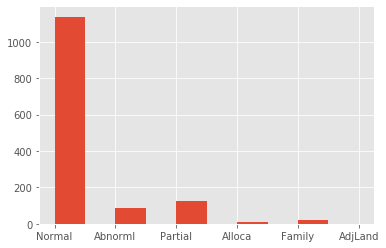

In [181]:
mydf2.SaleCondition.hist() # possibly remove this after corr check?

In [189]:
mydf2.SaleCondition.value_counts()
# Teh values are minimal compared to salesprice
#mydf[mydf['MiscVal']!=0][['MiscVal','SalePrice']] 

Normal     1137
Partial     123
Abnorml      87
Family       20
Alloca       11
AdjLand       1
Name: SaleCondition, dtype: int64

In [188]:
mydf2.head()

,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,8,Typ,0,2003.0,2,548,6,6,0,61,0,0,0,0,2,2008,Normal,208500
1,6,Typ,1,1976.0,2,460,6,6,298,0,0,0,0,0,5,2007,Normal,181500
2,6,Typ,1,2001.0,2,608,6,6,0,42,0,0,0,0,9,2008,Normal,223500
3,7,Typ,1,1998.0,3,642,6,6,0,35,272,0,0,0,2,2006,Abnorml,140000
4,9,Typ,1,2000.0,3,836,6,6,192,84,0,0,0,0,12,2008,Normal,250000


In [199]:
mydf2  = mydf2.drop('SaleCondition',1).drop('Functional',1)
mydf2.head()

,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice
0,8,0,2003.0,2,548,6,6,0,61,0,0,0,0,2,2008,208500
1,6,1,1976.0,2,460,6,6,298,0,0,0,0,0,5,2007,181500
2,6,1,2001.0,2,608,6,6,0,42,0,0,0,0,9,2008,223500
3,7,1,1998.0,3,642,6,6,0,35,272,0,0,0,2,2006,140000
4,9,1,2000.0,3,836,6,6,192,84,0,0,0,0,12,2008,250000


In [200]:
mydf2.to_csv('cdata_v1.csv')

In [195]:
np.sum(mydf2.isnull(),axis =0)

TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
MiscVal          0
MoSold           0
YrSold           0
SaleCondition    0
SalePrice        0
dtype: int64

In [201]:
# # This is to see correlations later on 
# An example from the Boston House prices

# import matplotlib.gridspec as gridspec
# import matplotlib as mpl
# import matplotlib.pyplot as plt

# X_1 = mydf.drop('SalePrice',1)
# X_1 = X_bos.drop('CHAS', 1).drop('RAD', 1)

# fig = plt.figure(figsize=(14, 33))
# gs = gridspec.GridSpec(11, 2)

# for i in range(11):
#     ax1 = plt.subplot(gs[i, 0])
#     ax2 = plt.subplot(gs[i, 1])    
#     sns.regplot(y_bos, X_1.iloc[:, i], ax=ax1)
#     ax1.set_title('')
#     ax1.set_xlabel('')
#     ylim = ax1.get_ylim()   
#     X_1[X_1.columns[i]].hist(bins=50, ax=ax2, orientation='horizontal')    
#     ax2.set_ylim((ylim[0], ylim[1]))
#     ax2.set_xlabel('')
#     ax2.set_xlim((0, 200))
#     for tick in ax2.yaxis.get_major_ticks():
#         tick.label1On = False
#         tick.label2On = True
#     if i != 0:
#         ax1.set_xticklabels([''])
#         ax2.set_xticklabels([''])
#     else:
#         ax1.set_title('MEDV \n', size=15)
#         ax2.set_title('count \n', size=15)
#         for tick in ax1.xaxis.get_major_ticks():
#             tick.label1On = False
#             tick.label2On = True
#         for tick in ax2.xaxis.get_major_ticks():
#             tick.label1On = False
#             tick.label2On = True
# plt.tight_layout(pad=0, w_pad=0, h_pad=0)
# plt.show()

In [203]:
# Running regression on the model mydf2: 
from sklearn.linear_model import LinearRegression

# Project Linear Model Object 
# Ordinary least squares Linear Regression. RSS
plmodel = LinearRegression()
X_train = mydf2.drop('SalePrice',1)

In [219]:
# Create the Y and X matrixes 
Y_train = mydf2['SalePrice']
Y_train_log = np.log(mydf2['SalePrice']) # the log Saleprice is closer to normal disribution



In [210]:
type(X_train)
type(Y_train)

pandas.core.frame.DataFrame

In [212]:
plmodel.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [213]:
# Calculate Regression Results
print("beta_0: " + str(np.round(plmodel.intercept_, 3)))


beta_0: -1649211.719


In [224]:
print(plmodel.coef_) # Coefficient Results


[ 1.29183749e+04  2.78897495e+04  6.57726488e+02  2.41468617e+04
  6.10831984e+01  3.98269398e+01  3.98269398e+01  7.09548747e+01
  1.06807663e+02  2.19566053e+01  9.11363719e+01  8.19419944e+01
 -6.39982384e-01  2.50609121e+01  1.69535666e+02]


In [230]:
colnames = mydf2.drop('SalePrice',1).columns
result = pd.DataFrame(plmodel.coef_).transpose()
print(result.columns)

result.columns = colnames.tolist()
print(colnames.tolist())
result['intercept'] = plmodel.intercept_ 
result = result.transpose()
result.columns = ['coefficient']
result

RangeIndex(start=0, stop=15, step=1)
['TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold']


,coefficient
TotRmsAbvGrd,1.291837e+04
Fireplaces,2.788975e+04
GarageYrBlt,6.577265e+02
GarageCars,2.414686e+04
GarageArea,6.108320e+01
GarageQual,3.982694e+01
GarageCond,3.982694e+01
WoodDeckSF,7.095487e+01
OpenPorchSF,1.068077e+02
EnclosedPorch,2.195661e+01


In [216]:
# RSS calculation. Do a function for it???
print("RSS: %.2f" % np.sum((plmodel.predict(X_train) - Y_train) ** 2))

RSS: 3249157430832.63


In [217]:
# The coefficient of determination calculation Do a function for it???
print("R^2: %.5f" % plmodel.score(X_train, Y_train))

R^2: 0.62242


In [220]:
# Using the log of the SalePrice 
# There is significant increase in the R^2 and RSS already. 

plmodel_log = LinearRegression()
plmodel_log.fit(X_train, Y_train_log)
print("RSS: %.2f" % np.sum((plmodel_log.predict(X_train) - Y_train_log) ** 2))
print("R^2: %.5f" % plmodel_log.score(X_train, Y_train_log))

RSS: 64.03
R^2: 0.67847


In [222]:
# Running Cross Validation on the train dataset
try:  # train_test_split was moved in 0.18.0
    from sklearn.model_selection import train_test_split
except:  # Following import works through 0.19 but outputs a warning in 0.18
    from sklearn.cross_validation import train_test_split
X_tr, X_cv, y_tr, y_cv = train_test_split(X_train, Y_train, test_size=0.2, random_state=50)



In [232]:
# Do multiple linear regression on the new split set
# It c
cvmodel = LinearRegression()
cvmodel.fit(X_tr,y_tr)
print("R^2 for train set: %f" %cvmodel.score(X_tr, y_tr))
print('-'*50)
print("R^2 for test  set: %f" %cvmodel.score(X_cv, y_cv))


R^2 for train set: 0.621260
--------------------------------------------------
R^2 for test  set: 0.621613


In [236]:
# Providing some insights with the help of statistical model

import statsmodels.api as sm 
X_tr_const = sm.add_constant(X_tr)
statmodel = sm.OLS(y_tr, X_tr_const)
ans = statmodel.fit()
print(ans.summary())



                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     127.5
Date:                Sat, 22 Feb 2020   Prob (F-statistic):          8.97e-218
Time:                        16:33:15   Log-Likelihood:                -13438.
No. Observations:                1103   AIC:                         2.691e+04
Df Residuals:                    1088   BIC:                         2.698e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -2.37e+06    2.2e+06     -1.076

In [239]:
import os
os.listdir()

['Kaggle.ipynb',
 'corr.csv',
 'cdata_v1.csv',
 'fcorr.csv',
 '.Rapp.history',
 'train.csv',
 '.ipynb_checkpoints']

In [240]:
os.getcwd()

'/Users/karolylajko/Documents/Academy/DataScienceBootcamp2020/Projects/Kaggle/Housedata'